## Sign language detector

This notebook explores the YOLOv11 model through the development of a sign language detector. The detector is trained to recognize and classify five essential gestures: "yes," "hello," "no," "thank you," and "I love you."

In [1]:
import torch
import matplotlib.pyplot as plt 
from PIL import Image  # To open the saved output image
import numpy as np
import cv2

from ultralytics import YOLO

### 1. Loading the model and make detection

YOLOv11 was trained on the COCO-80 dataset

In [2]:
model = YOLO("yolo11m.pt")

In [3]:
def read_image(path):
    img = Image.open(path)

    # Plot image
    plt.imshow(img)
    plt.axis('off')  # Hide axis
    plt.show()

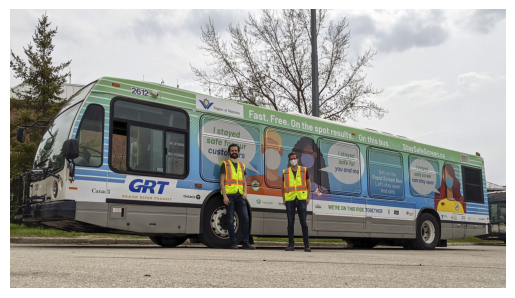

In [4]:
read_image("bus.jpg")


image 1/1 c:\Users\Lenovo\Desktop\Python\Deep Learning\YOLO\bus.jpg: 384x640 2 persons, 1 bus, 1 truck, 789.3ms
Speed: 0.0ms preprocess, 789.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict


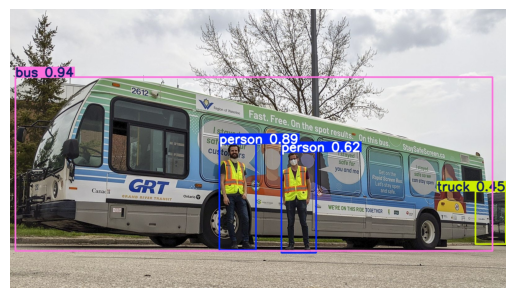

In [5]:
img = "bus.jpg"
prediction = model.predict(img, save=True)

read_image("C:/Users/Lenovo/Desktop/Python/Deep Learning/YOLO/runs/detect/predict/bus.jpg")

### 2. Collecting the data

In this step the data is collected and labeled using the labelImg GitHub package

In [6]:
import uuid # Unique identifier
import os
import time 

In [7]:
images_path = "C:/Users/Lenovo/Desktop/Python/Deep Learning/YOLO/data/images"

labels = ["hello", "yes", "no", "thanks", "iloveyou"]

number_imgs = 20

In [ ]:
for label in labels:
    cap = cv2.VideoCapture(0)
    print(f'Collecting images for {label}')
    time.sleep(5)

    # Loop through image range
    for img_num in range(number_imgs):       
        # Webcam feed
        ret, frame = cap.read()

        # Naming out image path
        imgname = os.path.join(images_path, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()

cv2.destroyAllWindows()

In [ ]:
!git clone https://github.com/tzutalin/labelImg

In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

### 3. Model training

In [6]:
results = model.train(data="dataset.yaml", epochs=20, imgsz=320, batch=20, patience=5)

New https://pypi.org/project/ultralytics/8.3.19 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.18  Python-3.12.2 torch-2.3.1+cpu CPU (11th Gen Intel Core(TM) i5-1145G7 2.60GHz)
engine\trainer: task=detect, mode=train, model=yolo11m.pt, data=dataset.yaml, epochs=20, time=None, patience=25, batch=20, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=

train: Scanning C:\Users\Lenovo\Desktop\Python\Deep Learning\YOLO\data\labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
val: Scanning C:\Users\Lenovo\Desktop\Python\Deep Learning\YOLO\data\labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000417, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.00046875), 112 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 320 train, 320 val
Using 0 dataloader workers
Logging results to runs\detect\train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      2.981      4.972      3.131         42        320: 100%|██████████| 5/5 [01:49<00:00, 21.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.79s/it]

                   all        100        100   0.000493       0.01   0.000265    5.3e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      2.784      4.928      3.018         42        320: 100%|██████████| 5/5 [01:55<00:00, 23.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:27<00:00,  9.21s/it]

                   all        100        100   0.000493       0.01   0.000265    5.3e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      2.539      4.788      2.652         40        320: 100%|██████████| 5/5 [02:02<00:00, 24.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:33<00:00, 11.04s/it]

                   all        100        100   0.000493       0.01   0.000265    5.3e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      2.287      4.633      2.383         41        320: 100%|██████████| 5/5 [01:53<00:00, 22.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:34<00:00, 11.41s/it]

                   all        100        100    0.00498       0.05    0.00865    0.00188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      2.092      4.388      2.109         59        320: 100%|██████████| 5/5 [01:47<00:00, 21.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:29<00:00,  9.67s/it]

                   all        100        100      0.203       0.07      0.113     0.0548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      1.897      4.203      1.995         44        320: 100%|██████████| 5/5 [01:47<00:00, 21.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:27<00:00,  9.10s/it]

                   all        100        100      0.206       0.16      0.132     0.0684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      1.731      4.032      1.856         47        320: 100%|██████████| 5/5 [01:34<00:00, 18.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:28<00:00,  9.38s/it]

                   all        100        100      0.107       0.26      0.169     0.0703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G       1.65      3.813      1.716         36        320: 100%|██████████| 5/5 [01:47<00:00, 21.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:33<00:00, 11.00s/it]

                   all        100        100      0.188       0.37      0.274      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      1.482      3.578      1.657         43        320: 100%|██████████| 5/5 [01:58<00:00, 23.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:31<00:00, 10.50s/it]

                   all        100        100      0.119       0.48      0.405       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      1.472      3.403      1.578         38        320: 100%|██████████| 5/5 [02:00<00:00, 24.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:33<00:00, 11.21s/it]

                   all        100        100     0.0969       0.57       0.43      0.219


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G      1.208      2.902      1.409         20        320: 100%|██████████| 5/5 [01:37<00:00, 19.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:26<00:00,  8.85s/it]

                   all        100        100      0.905      0.261      0.496      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      1.178      2.638      1.412         20        320: 100%|██████████| 5/5 [01:31<00:00, 18.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:26<00:00,  8.81s/it]

                   all        100        100      0.702      0.319      0.563      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G      1.106      2.333      1.351         20        320: 100%|██████████| 5/5 [01:38<00:00, 19.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:26<00:00,  8.92s/it]

                   all        100        100      0.701       0.44      0.685      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G      1.123      2.017      1.329         20        320: 100%|██████████| 5/5 [01:34<00:00, 18.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:26<00:00,  8.95s/it]

                   all        100        100      0.693      0.575      0.788       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G       1.05      1.813      1.279         20        320: 100%|██████████| 5/5 [01:33<00:00, 18.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:25<00:00,  8.66s/it]

                   all        100        100      0.745      0.655      0.851      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G      1.019      1.627      1.316         20        320: 100%|██████████| 5/5 [01:38<00:00, 19.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:27<00:00,  9.22s/it]

                   all        100        100      0.801      0.731      0.863      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G      1.033      1.638      1.297         20        320: 100%|██████████| 5/5 [01:36<00:00, 19.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:30<00:00, 10.23s/it]

                   all        100        100      0.805      0.757      0.893      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G      1.011       1.45      1.285         20        320: 100%|██████████| 5/5 [01:44<00:00, 20.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:28<00:00,  9.42s/it]

                   all        100        100       0.81      0.806      0.911      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G     0.9861      1.353       1.28         20        320: 100%|██████████| 5/5 [01:41<00:00, 20.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:31<00:00, 10.64s/it]

                   all        100        100      0.817      0.821      0.918      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G     0.9934      1.289      1.241         20        320: 100%|██████████| 5/5 [01:42<00:00, 20.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:32<00:00, 10.76s/it]

                   all        100        100      0.833      0.834      0.928      0.685



20 epochs completed in 0.768 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 40.5MB
Optimizer stripped from runs\detect\train\weights\best.pt, 40.5MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.18  Python-3.12.2 torch-2.3.1+cpu CPU (11th Gen Intel Core(TM) i5-1145G7 2.60GHz)
YOLO11m summary (fused): 303 layers, 20,045,452 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:27<00:00,  9.01s/it]


                   all        100        100      0.834      0.837      0.928      0.683
                 hello         20         20      0.954          1      0.995      0.799
              iloveyou         20         20      0.808      0.633      0.875      0.706
                    no         20         20      0.614        0.6      0.795      0.529
                thanks         20         20      0.836          1      0.995      0.706
                   yes         20         20      0.955       0.95      0.981      0.673
Speed: 1.4ms preprocess, 246.0ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\train


In [8]:
model = YOLO("C:/Users/Lenovo/Desktop/Python/Deep Learning/YOLO/runs/detect/train/weights/best.pt")
results = model.predict("data/images/iloveyou.d4db4f1e-9012-11ef-9167-c4bde5b53e88.jpg", save=True)


image 1/1 c:\Users\Lenovo\Desktop\Python\Deep Learning\YOLO\data\images\iloveyou.d4db4f1e-9012-11ef-9167-c4bde5b53e88.jpg: 256x320 (no detections), 265.2ms
Speed: 0.0ms preprocess, 265.2ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)
Results saved to runs\detect\predict3


In [13]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break
    
    # Make detections
    results = model(frame)  # Results will be a list of predictions

    for result in results:
        # Render boxes and labels onto the original frame
        annotated_frame = result.plot()  # Use plot() instead of render()

        # Display the frame with detections
        cv2.imshow('YOLO', annotated_frame)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 256x320 (no detections), 251.5ms
Speed: 2.0ms preprocess, 251.5ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 271.2ms
Speed: 2.0ms preprocess, 271.2ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 246.4ms
Speed: 0.0ms preprocess, 246.4ms inference, 14.5ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 236.2ms
Speed: 0.0ms preprocess, 236.2ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 233.3ms
Speed: 1.1ms preprocess, 233.3ms inference, 2.9ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 241.5ms
Speed: 2.5ms preprocess, 241.5ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 239.4ms
Speed: 1.0ms preprocess, 239.4ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 238.4ms
Speed: 1.7ms prep